# Parameter tuning for the 2D no-overlap constraints

Check the other notebooks for basic usage examples.

This notebook is just a simple experiment on the parameters for the 2D no-overlap constraints.
CP-SAT exposes some parameters to control the handling of the no-overlap constraints.
This concrete example shows an instance were the default parameters take a long time to find a solution,
but when changing the parameters, the solution is found within a second.

In [1]:
from ortools.sat.python import cp_model

In [2]:
# Instance
container = (40, 15)
boxes = [
    (11, 3),
    (13, 3),
    (9, 2),
    (7, 2),
    (9, 3),
    (7, 3),
    (11, 2),
    (13, 2),
    (11, 4),
    (13, 4),
    (3, 5),
    (11, 2),
    (2, 2),
    (11, 3),
    (2, 3),
    (5, 4),
    (6, 4),
    (12, 2),
    (1, 2),
    (3, 5),
    (13, 5),
    (12, 4),
    (1, 4),
    (5, 2),
    # (6,  2),  # add to make tight
    # (6,3), # add to make infeasible
]

In [3]:
def pack(container, boxes, scale: int, parameter_tuning: bool):
    container = (container[0] * scale, container[1] * scale)
    boxes = [(box[0] * scale, box[1] * scale) for box in boxes]
    model = cp_model.CpModel()
    # We have to create the variable for the bottom left corner of the boxes.
    # We directly limit their range, such that the boxes are inside the container
    x_vars = [
        model.new_int_var(0, container[0] - box[0], name=f"x1_{i}")
        for i, box in enumerate(boxes)
    ]
    y_vars = [
        model.new_int_var(0, container[1] - box[1], name=f"y1_{i}")
        for i, box in enumerate(boxes)
    ]
    # Interval variables are actually more like constraint containers, that are then passed to the no overlap constraint
    # Note that we could also make size and end variables, but we don't need them here
    x_interval_vars = [
        model.new_interval_var(
            start=x_vars[i], size=box[0], end=x_vars[i] + box[0], name=f"x_interval_{i}"
        )
        for i, box in enumerate(boxes)
    ]
    y_interval_vars = [
        model.new_interval_var(
            start=y_vars[i], size=box[1], end=y_vars[i] + box[1], name=f"y_interval_{i}"
        )
        for i, box in enumerate(boxes)
    ]
    # Enforce that no two rectangles overlap
    model.add_no_overlap_2d(x_interval_vars, y_interval_vars)
    # Solve!
    solver = cp_model.CpSolver()
    solver.parameters.log_search_progress = True
    if parameter_tuning:
        solver.parameters.use_energetic_reasoning_in_no_overlap_2d = True
        solver.parameters.use_timetabling_in_no_overlap_2d = True
        # solver.parameters.use_pairwise_reasoning_in_no_overlap_2d = True
    solver.log_callback = print
    status = solver.solve(model)
    assert status == cp_model.OPTIMAL
    # plot the solution
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    fig, ax = plt.subplots(1)
    ax.set_xlim(0, container[0])
    ax.set_ylim(0, container[1])
    for i, box in enumerate(boxes):
        ax.add_patch(
            patches.Rectangle(
                (solver.value(x_vars[i]), solver.value(y_vars[i])),
                box[0],
                box[1],
                facecolor="blue",
                alpha=0.2,
                edgecolor="b",
            )
        )
    # uniform axis
    ax.set_aspect("equal", adjustable="box")
    plt.show()



Starting CP-SAT solver v9.10.4067Starting CP-SAT solver v9.10.4067
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true
Setting number of workers to 8

Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true
Setting number of workers to 8


Initial satisfaction model '': (model_fingerprint: 0x413a5366acad63cb)
#Variables: 48
  - 3 in [0,10000]
  - 6 in [0,11000]
  - 6 in [0,12000]
  - 9 in [0,13000]
  - 4 in [0,27000]
  - 2 in [0,28000]
  - 5 in [0,29000]
  - 2 in [0,31000]
  - 2 in [0,33000]
  - 1 in [0,34000]
  - 2 in [0,35000]
  - 2 in [0,37000]
  - 2 in [0,38000]
  - 2 in [0,39000]
#kInterval: 48
#kNoOverlap2D: 1 (#rectangles: 24)

Starting presolve at 0.00s
  1.90e-05s  0.00e+00d  [DetectDominanceRelations] 
  1.40e-04s  0.00e+00d  [PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  3.00e-06s  0.00e+00d  [ExtractEncodingFromLinear]

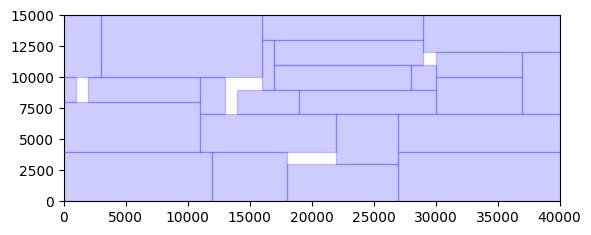

In [4]:
pack(container, boxes, 1000, True)


Starting CP-SAT solver v9.10.4067

Parameters: log_search_progress: true
Starting CP-SAT solver v9.10.4067
Parameters: log_search_progress: true
Setting number of workers to 8
Setting number of workers to 8


Initial satisfaction model '': (model_fingerprint: 0x413a5366acad63cb)
#Variables: 48
  - 3 in [0,10000]
  - 6 in [0,11000]
  - 6 in [0,12000]
  - 9 in [0,13000]
  - 4 in [0,27000]
  - 2 in [0,28000]
  - 5 in [0,29000]
  - 2 in [0,31000]
  - 2 in [0,33000]
  - 1 in [0,34000]
  - 2 in [0,35000]
  - 2 in [0,37000]
  - 2 in [0,38000]
  - 2 in [0,39000]
#kInterval: 48
#kNoOverlap2D: 1 (#rectangles: 24)
Initial satisfaction model '': (model_fingerprint: 0x413a5366acad63cb)
#Variables: 48
  - 3 in [0,10000]
  - 6 in [0,11000]
  - 6 in [0,12000]
  - 9 in [0,13000]
  - 4 in [0,27000]
  - 2 in [0,28000]
  - 5 in [0,29000]
  - 2 in [0,31000]
  - 2 in [0,33000]
  - 1 in [0,34000]
  - 2 in [0,35000]
  - 2 in [0,37000]
  - 2 in [0,38000]
  - 2 in [0,39000]
#kInterval: 48
#kNoOverlap2D: 1 (#re

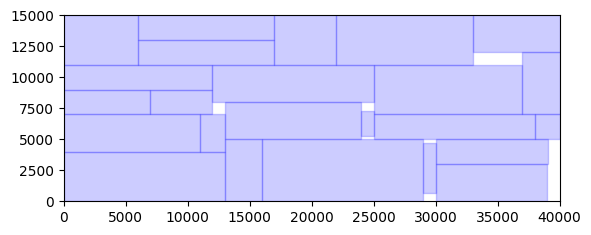

In [5]:
pack(container, boxes, 1000, False)